## NLO (Non Linear Optimization) Methods
### **Advanced Maths for Data Science**
### *Implementation of 4 NLO Methods*
> Alexander Sánchez


* The **Levy Function** requires **d** (dimension) parameter (*i* indexed at 1) 

$$
\large f(\textbf{x}) = \sin^2(\pi w_{1}) \ + \ \sum_{i = 1}^{d - 1} [w_{i} - 1]^2[1 + 10\sin^2(\pi w_{i} + 1)] \ + \ (w_{d} - 1)^2[1 + \sin^2(2\pi w_{d} )] \ , \ \ where \\ \\
w_{i} = 1 + \frac{x_{i} - 1}{4} \ , \ for \ all \  i = 1,...,d 
$$

* Import the necessary libraries

In [23]:
import pandas as pd
import autograd.numpy as np
from scipy.optimize import minimize_scalar
from autograd import grad, hessian
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

* **Levy Function:**

In [18]:
def f(x):
    # Set d (dimension)
    d = len(x)
    # Calculate w values
    w = []
    for i in range(d):
        w.append(1 + ((x[i] - 1)/4))
    # Calculate the first term
    first_term = (np.sin(np.pi * w[0]))**2
    # Calculate the second term
    second_term = 0
    for i in range(d):
        second_term += ((w[i] - 1)**2) * (1 + 10 * ((np.sin(np.pi * w[i] + 1))**2))
    # Calculate the third term
    third_term = ((w[d - 1] - 1)**2) + (1 + (np.sin(2*np.pi * w[d - 1]))**2)
    return first_term + second_term + third_term

* **Plot** the **function**:

In [19]:
def plot_function(points, title):
    # Plot the function in 3D
    x1 = np.linspace(-10, 10, 200)
    x2 = np.linspace(-10, 10, 200)

    x, y  = np.meshgrid(x1, x2)

    z = np.zeros((len(x1), len(x2)))

    for i in range(len(x1)):
        for j in range(len(x2)):
            z[i, j] = f([x1[i], x2[j]])

    fig = plt.figure()
    fig.set_size_inches(8, 8)
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    # Get x and y values
    x_points = [point[0] for point in points]
    y_points = [point[1] for point in points]
    z_points = [f(point) for point in points]

    ax.plot3D(x_points, y_points, z_points, color='red')
    ax.plot_surface(x, y, z, alpha=0.6, cmap='viridis')

    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')

    ax.set_xlim(-12, 12)
    ax.set_ylim(-12, 12)
    ax.set_zlim(0, 200)

    plt.show()

#### 1. **Descendent Gradient**

The optimal point is:  [0.99999972 1.00000011]
The optimal value is:  1.0000000000001255


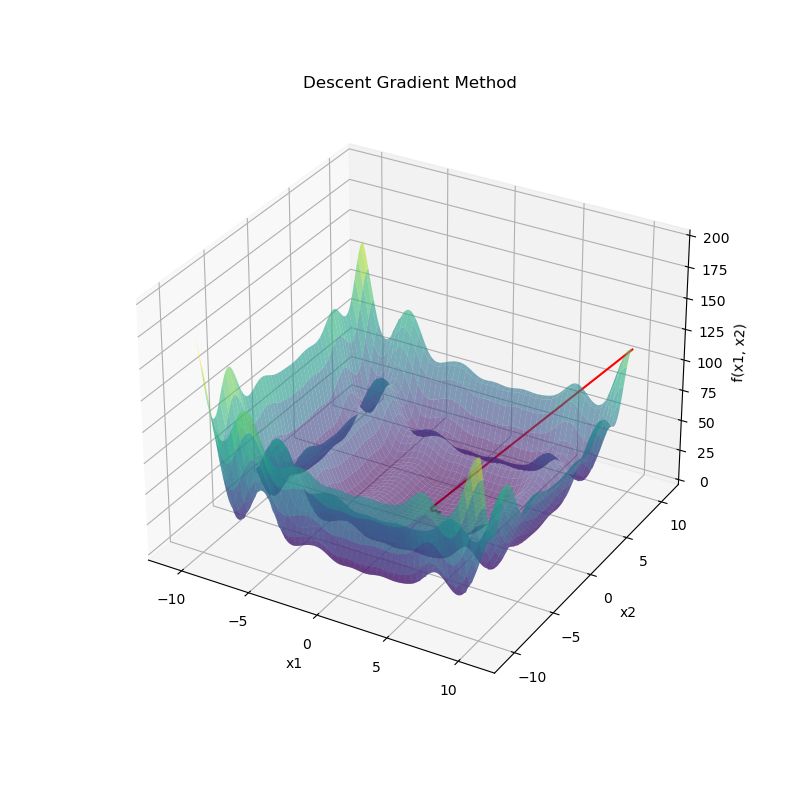

,xk,pk = -grad_f(xk),||grad_f(xk)||,alph = min phi(alpha)
16,"[0.9999856148640438, 0.9999951459426408]","[3.227698052735768e-05, 2.9463581959594798e-05]",0.000044,0.251077
17,"[0.9999937188725799, 1.0000025435714093]","[1.4093492655542723e-05, -1.5439217433167648e-05]",0.000021,0.230903
18,"[0.9999969731025639, 0.9999989786095131]","[6.7917169617018554e-06, 6.199730563279591e-06]",0.000009,0.251078
19,"[0.9999986783538033, 1.0000005352259456]","[2.965497251366774e-06, -3.248765122572655e-06]",0.000004,0.230900
20,"[0.999999363087385, 0.9999997850857869]","[1.4290990934223522e-06, 1.3045064259712055e-06]",0.000002,0.251054


In [25]:
%matplotlib widget

# Set the data frame to store the values
des_gradient_df = pd.DataFrame(columns=['xk', 'pk = -grad_f(xk)', '||grad_f(xk)||', 'alph = min phi(alpha)'])

def des_gradient(f, tol, max_iter, k, x0):
    xk = x0
    grad_f = grad(f)
    while(k <= max_iter):
        # Calculate the direction of minimum descent
        pk = -grad_f(xk)
        if((np.linalg.norm(grad_f(xk)) < tol)):
            break
        # Calculate the step size
        phi = lambda alpha: f(xk + alpha*pk)
        alph = minimize_scalar(phi).x
        # Store the values
        des_gradient_df.loc[k] = [xk, pk, np.linalg.norm(grad_f(xk)), alph]
        # Update the point
        xk = xk + alph*pk
        k += 1
    return xk


# Set the initial point
x0 = np.array([10.0, 10.0])
# Set the tolerance
tol = 1e-6
# Set the maximum number of iterations
max_iter = 1000
# Set the iteration counter
k = 0
# Perform the gradient descent
x_opt = des_gradient(f, tol, max_iter, k, x0)
print('The optimal point is: ', x_opt)
print('The optimal value is: ', f(x_opt))

# Get the point values
points = des_gradient_df['xk'].values

# Plot the function
plot_function(points, 'Descent Gradient Method')

# Show the results
des_gradient_df.tail()



#### 2. **Newton Method** 

The optimal point is:  [1. 1.]
The optimal value is:  1.0


C:\Users\msanc\AppData\Local\Temp\ipykernel_23424\1199009662.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


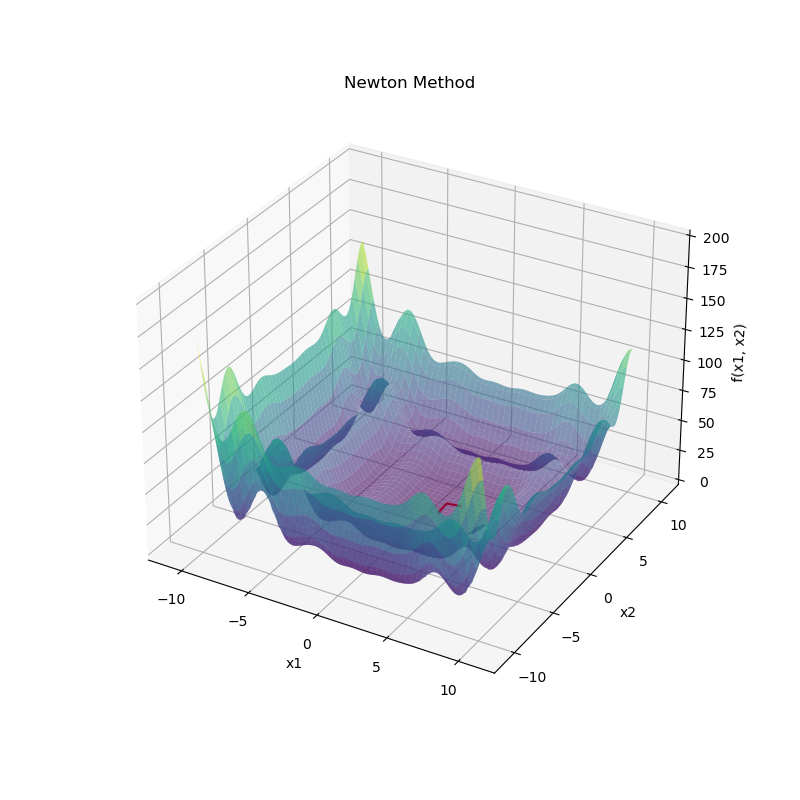

,xk,grad_f(xk),pk,||grad_f(xk)||,xk + alpha*pk,alph = min phi(alpha)
996,"[1.0000000000086549, 1.0000000011897856]","[1.9418619545757632e-11, 7.221873433214825e-09]","[-8.654374714939375e-12, -1.1897857625006175e-09]",7.221900e-09,"[1.0000000000086549, 1.0000000011897856]",0.0
997,"[1.0000000000086549, 1.0000000011897856]","[1.9418619545757632e-11, 7.221873433214825e-09]","[-8.654374714939375e-12, -1.1897857625006175e-09]",7.221900e-09,"[1.0000000000086549, 1.0000000011897856]",0.0
998,"[1.0000000000086549, 1.0000000011897856]","[1.9418619545757632e-11, 7.221873433214825e-09]","[-8.654374714939375e-12, -1.1897857625006175e-09]",7.221900e-09,"[1.0000000000086549, 1.0000000011897856]",0.0
999,"[1.0000000000086549, 1.0000000011897856]","[1.9418619545757632e-11, 7.221873433214825e-09]","[-8.654374714939375e-12, -1.1897857625006175e-09]",7.221900e-09,"[1.0000000000086549, 1.0000000011897856]",0.0
1000,"[1.0000000000086549, 1.0000000011897856]","[1.9418619545757632e-11, 7.221873433214825e-09]","[-8.654374714939375e-12, -1.1897857625006175e-09]",7.221900e-09,"[1.0000000000086549, 1.0000000011897856]",0.0


In [34]:
%matplotlib widget

# Set the data frame to store the values
newton_method_df = pd.DataFrame(columns=['xk', 'grad_f(xk)' ,'pk', '||grad_f(xk)||', 'xk + alpha*pk', 'alph = min phi(alpha)'])

def newton_method(f, tol, max_iter, k, x0):
    xk = x0
    while(k <= max_iter):
        # Calculate the gradient
        grad_f = grad(f)
        # Calculate the Hessian matrix
        hessian_f = hessian(f)
        # Calculate the direction of minimum descent
        pk = -np.linalg.inv(hessian_f(xk)).dot(grad_f(xk))
        if((np.linalg.norm(grad_f(xk)) < tol)):
            break
        # Calculate the step size
        phi = lambda alpha: f(xk + alpha*pk)
        alph = minimize_scalar(phi).x
        # Store the values
        newton_method_df.loc[k] = [xk, grad_f(xk), pk, np.linalg.norm(grad_f(xk)), xk + alph*pk, alph]
        # Update the point
        xk = xk + alph*pk
        k += 1
    return xk


# Set the initial point
x0 = np.array([2.0, 2.0])
# Set the tolerance
tol = 1e-10
# Set the maximum number of iterations
max_iter = 1000
# Set the iteration counter
k = 0
# Perform the gradient descent
x_opt = newton_method(f, tol, max_iter, k, x0)
print('The optimal point is: ', x_opt)
print('The optimal value is: ', f(x_opt))

# Get the point values
points = newton_method_df['xk'].values

# Plot the function
plot_function(points, 'Newton Method')

# Show the results
newton_method_df.tail()



#### 3. **Cuasi-Newton Method** 

The optimal point is:  [0.99999975 1.00000005]
The optimal value is:  1.0000000000000813


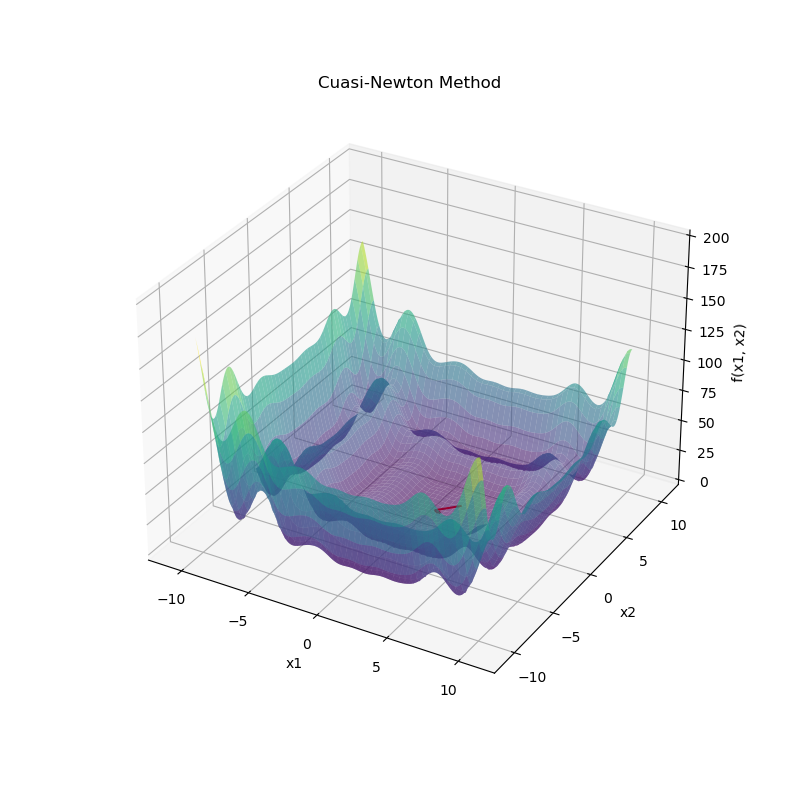

,xk,grad_f(xk),||grad_f(xk)||,pk,alph = min phi(alpha),xk + 1,sk,yk,Bk
13,"[0.999983422310867, 0.9999891050598352]","[-2.0991756735047308e-05, 1.1807099058134802e-05]",2.408446e-05,"[3.719652360623692e-05, 6.613097269114137e-05]",0.194162,"[0.9999906444666368, 1.0000019451894946]","[7.222155769759375e-06, 1.2840129659408284e-05]","[1.6204766871189613e-05, 7.793807174927617e-05]","[[1.0, 0.0], [0.0, 1.0]]"
14,"[0.9999906444666368, 1.0000019451894946]","[-6.102036390775635e-06, -1.0848865418532035e-05]",1.244720e-05,"[2.0991756735047308e-05, -1.1807099058134802e-05]",0.316125,"[0.9999972804763474, 0.9999982126755849]","[6.636009710625501e-06, -3.7325139097266202e-06]","[1.4889720344271673e-05, -2.265596447666684e-05]","[[1.0, 0.0], [0.0, 1.0]]"
15,"[0.9999972804763474, 0.9999982126755849]","[-3.4390763788451927e-06, 1.958906425577579e-06]",3.957848e-06,"[6.102036390775635e-06, 1.0848865418532035e-05]",0.194495,"[0.9999984672915186, 1.0000003227249594]","[1.1868151712501884e-06, 2.1100493745596083e-06]","[2.6629600119304425e-06, 1.2807771844109613e-05]","[[1.0, 0.0], [0.0, 1.0]]"
16,"[0.9999984672915186, 1.0000003227249594]","[-1.0133947434047555e-06, -1.7787952422296939e...",2.047213e-06,"[3.4390763788451927e-06, -1.958906425577579e-06]",0.314347,"[0.9999995483561442, 0.9999997069478703]","[1.0810646255965395e-06, -6.157770890968806e-07]","[2.425681635440437e-06, -3.737701667807273e-06]","[[1.0, 0.0], [0.0, 1.0]]"
17,"[0.9999995483561442, 0.9999997069478703]","[-5.70403127188675e-07, 3.246994803468324e-07]",6.563455e-07,"[1.0133947434047555e-06, 1.7787952422296939e-06]",0.194820,"[0.9999997457860927, 1.0000000534934343]","[1.9742994850080464e-07, 3.4654556402280434e-07]","[4.4299161621608055e-07, 2.103494722576526e-06]","[[1.0, 0.0], [0.0, 1.0]]"


In [28]:
%matplotlib widget

# Set the data frame to store the values
cuasi_newton_method_df = pd.DataFrame(columns=['xk', 'grad_f(xk)', '||grad_f(xk)||', 'pk', 'alph = min phi(alpha)', 'xk + 1', 'sk', 'yk', 'Bk'])

def is_positive_definite(A):
    try:
        np.linalg.cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False
    
def cuasi_update_bfgs(b, sk, yk):
    sk = sk.reshape(-1, 1)
    yk = yk.reshape(-1, 1)

    rho_k = 1.0 / (sk @ yk.T)
    term1 = (1.0 + ((yk.T @ b @ yk) * rho_k)) * ((sk @ sk.T) * rho_k)
    term2 = (b @ yk @ sk.T + sk @ yk.T @ b) * rho_k

    b_k = b + term1 - term2
    return b_k

def cuasi_newton_method(f, tol, max_iter, k, x0, b):
    xk = x0
    grad_f = grad(f)
    while(k <= max_iter):
        # Calculate the direction of minimum descent
        pk = -(b.dot(grad_f(xk)))
        # Calculate the step size
        alph = minimize_scalar(lambda alpha: f(xk + alpha*pk)).x
        if((np.linalg.norm(grad_f(xk)) < tol)):
            break
        # Update the point
        xk_aux = xk
        xk = xk + alph*pk
        # Updte sk
        sk = xk - xk_aux
        # Update yk
        yk = grad_f(xk) - grad_f(xk_aux)
        # Store the values
        cuasi_newton_method_df.loc[k] = [xk_aux, grad_f(xk), np.linalg.norm(grad_f(xk)), pk, alph, xk, sk, yk, b]
        # Update the Hessian approximation
        b = cuasi_update_bfgs(b, sk, yk)
        if not is_positive_definite(b):
            b = np.identity(2)
        k += 1
    return xk

# Set the initial point
x0 = np.array([2.0, 2.0])
# Set the tolerance
tol = 1e-6
# Set the maximum number of iterations
max_iter = 1000
# Set the iteration counter
k = 0
# Set the initial Hessian approximation
b = np.identity(2)
# Perform the gradient descent
x_opt = cuasi_newton_method(f, tol, max_iter, k, x0, b)
print('The optimal point is: ', x_opt)
print('The optimal value is: ', f(x_opt))

# Get the point values
points = cuasi_newton_method_df['xk'].values

# Plot the function
plot_function(points, 'Cuasi-Newton Method')

# Show the results
cuasi_newton_method_df.tail()
